<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/yahoo_finance_historical_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import initial libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline

# Imports in order to be able to use Plotly offline.
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

4.1.1


In [11]:
# Download historical prices from Yahoo using fix_yahoo_finance

import fix_yahoo_finance as yf
import datetime

stocks = ["AAPL","MSFT"]
start = datetime.datetime(2012,5,31)
end = datetime.datetime(2019,10,23)
data = yf.download(stocks, start=start, end=end)

display(stocks[:])
data[:].head()

[*********************100%***********************]  2 of 2 downloaded


['AAPL', 'MSFT']

Open                  High  ...  Adj Close     Volume          
                 AAPL       MSFT       AAPL  ...       MSFT       AAPL      MSFT
Date                                         ...                                
2012-05-31  82.962860  29.299999  83.071426  ...  24.477589  122918600  39134000
2012-06-01  81.308571  28.760000  81.807144  ...  23.857056  130246900  56634300
2012-06-04  80.214287  28.620001  81.071426  ...  23.940908  139248900  47926300
2012-06-05  80.181427  28.510000  80.924286  ...  23.907368   97053600  45715400
2012-06-06  81.110001  28.879999  81.978569  ...  24.611753  100363900  46860500

[5 rows x 12 columns]

In [19]:
# Import historical index data from Yahoo using fix_yahoo_finance
# Reference:  https://finance.yahoo.com/world-indices/

import fix_yahoo_finance as yf

indices = ["^FTSE","^STOXX50E","^GSPC"]
start = datetime.datetime(2012,12,30)
end = datetime.datetime(2019,10,22)
data = yf.download(stocks, start=start, end=end, group_by = 'ticker')

display(type(data["^FTSE"]['Open'].tail()))
display(indices)
data["^FTSE"]['Open'].tail(5)

[*********************100%***********************]  3 of 3 downloaded


pandas.core.series.Series

['^FTSE', '^STOXX50E', '^GSPC']

Date
2019-10-16    7211.600098
2019-10-17    7168.000000
2019-10-18    7182.299805
2019-10-21    7150.600098
2019-10-22    7163.600098
Name: Open, dtype: float64

In [22]:
pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=aefc4cdaece6eab18000ec3e3bc7d4739515e060d114b291995cabe7bb1efcac
  Stored in directory: /tmp/pip-ephem-wheel-cache-pusmm7hi/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


[*********************100%***********************]  4 of 4 downloaded


,HISFX,^FTSE,^GSPC,^STOXX50E
Date,,,,
2019-07-26,12.91,7549.1,3025.86,3524.47
2019-07-29,12.78,7686.6,3020.97,3523.58
2019-07-30,12.94,7646.8,3013.18,3462.85
2019-07-31,12.89,7586.8,2980.38,3466.85
2019-08-01,NaN,7584.9,NaN,NaN


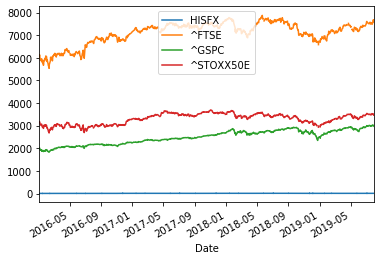

In [41]:
# Calculate index performance using yfinance
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

stocks = '^FTSE ^STOXX50E ^GSPC HISFX'
end_date = '2019-08-01'
start_date = '2016-01-01'

data = yf.download(stocks,start_date,end_date)

data['Adj Close'].plot()
display(data['Adj Close'].tail())
plt.show()

In [32]:
pip install yahoofinancials

(100, 2)

,Dates,Prices
0,2008-09-15,10.13
1,2008-09-16,10.56
2,2008-09-17,10.04
3,2008-09-18,11.26
4,2008-09-19,11.72


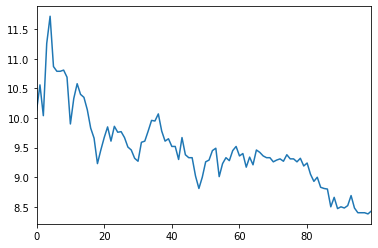

In [40]:
# Historical fund prices from yahoofinancials
# Reference for funds https://pypi.org/project/yahoofinancials/

from yahoofinancials import YahooFinancials

start_date = '2008-09-15'
end_date = '2018-09-15'
freq = 'daily'

mutual_funds = ['HISFX', 'QASGX', 'PRLAX']
yahoo_financials_mutualfunds = YahooFinancials(mutual_funds)
daily_mutualfund_prices = yahoo_financials_mutualfunds.get_historical_price_data(start_date, end_date, freq)

i=1

date_vec = []
price_vec_1 = []

for i in range(100):
  date_vec.append(daily_mutualfund_prices['HISFX']['prices'][i]['formatted_date'])
  price_vec_1.append(daily_mutualfund_prices['HISFX']['prices'][i]['close'])

import pandas as pd
df_histprices = pd.DataFrame()
df_histprices['Dates'] = date_vec
df_histprices['Prices'] = price_vec_1

display(df_histprices.shape)
display(df_histprices.head())

# Plot graph
import matplotlib.pyplot as plt
%matplotlib inline

df_histprices['Prices'].plot()
plt.show()